# 9.5  Classification metrics

## Nomenclature

Regardless of the cost function we use to perform logistic regression - tanh Least Squares or softmax cost - once the weights have been tuned it is generally referred to as a *trained classifier*. 

> Regardless of the cost function we use to perform logistic regression - tanh Least Squares or softmax cost - once the weights have been tuned it is generally referred to as a *trained classifier*. 

Moreover, remember that the general goal with logistic regression is to learn a set of $N+1$ parameters - the optimal bias and weights in $\mathbf{w}^{\star}$ - so that the tanh function

\begin{equation}
f(\mathbf{x}) = \text{tanh}\left(\mathring{\mathbf{x}}^{T}\mathbf{w}^{\star}\right)
\end{equation}

fits the given dataset as best as possible.  This was as close as we could get to directly fitting the discontinuous step function  $\text{sign}\left(\mathring{\mathbf{x}}^{T}\mathbf{w}^{\star}\right)$ directly to the data.  

Importantly, this function (sometimes called a *decision function*) provides us with a learned linear *separator* or *decision boundary* where it intersects the plane $y = 0$.  This is where

\begin{equation}
\mathring{\mathbf{x}}^{T}\mathbf{w}^{\star} = 0
\end{equation}

This boundary is used to make predictions about every point in the space.  If a point $\mathbf{x}$ lies above it (i.e., if $\mathring{\mathbf{x}}^{T}\mathbf{w}^{\star}  > 0$) then this point has a predicted label $+1$, likewise if the point lies below (i.e., if $\mathbf{x}^{T}\mathbf{w}^{\star} < 0$) the point has a predicted label $-1$.  If a point lies precisely on the boundary we cannot say which class it belongs to (in such cases one is typically assigned to the point at random).  Wrapping together these conditions we can say that to predict the label of an input point $\mathbf{x}_{\textrm{new}}$ we evaluate its weighted version using the sign function.  Denoting the predicted label $y_{\textrm{new}}$ we have

\begin{equation}
\text{sign}\,\left(\mathring{\mathbf{x}}_{\textrm{new}}^{T}\mathbf{w}^{\star}\right) = y_{\textrm{new}}
\end{equation}

> Once weights are properly tuned the *decision boundary* $\mathring{\mathbf{x}}^{T}\mathbf{w}^{\star} = 0$ provides a rule for determining which points - according to the classifier - belong to class $+1$ or $-1$.  This is done by  computing $\text{sign}\,\left(\mathring{\mathbf{x}}_{\textrm{new}}^{T}\mathbf{w}^{\star}\right)$.


\begin{equation}
\text{sign}\left(\mathring{\mathbf{x}}_{\textrm{new}}^{T}\mathbf{w}^{\star}\right) = y_{\textrm{new}}
\end{equation}

> Once weights are properly tuned the *decision boundary* $\mathring{\mathbf{x}}^{T}\mathbf{w}^{\star} = 0$ provides a rule for determining which points - according to the classifier - belong to class $+1$ or $-1$.  This is done by  computing $\text{sign}\left(\mathring{\mathbf{x}}_{\textrm{new}}^{T}\mathbf{w}^{\star}\right)$.

<figure>
  <img src= '../../mlrefined_images/superlearn_images/Fig_4_6_new.png' width="85%" height="80%" alt=""/>
  <figcaption>   
<strong>Figure 3:</strong> <em> Once a hyperplane has been learned to the current dataset with optimal parameters $w_0^{\star}$ and $\mathbf{w}^{\star}$, the label $y_{\textrm{new}}$ of a new point $\mathbf{x}_{\textrm{new}}$ can be predicted by simply checking which side of the boundary it lies on. In the illustration shown here $\mathbf{x}_{\textrm{new}}$ lies below the learned hyperplane, and as a result is given the label $y_{\textrm{new}}=\textrm{sign}\left(\mathring{\mathbf{x}}_{\textrm{new}}^{T}\mathbf{w}^{\star}\right)=-1$. </em>  </figcaption> 
</figure>

## 9.1.8  Counting misclassifications and the accuracy of a trained classifier

Notice how because $y_p \in \{\pm 1\}$ that the error produced by the counting cost for a single point either equals $0$ when the prediction matches the true label, or $4$ when a misclassification occurs - strictly employing our `model` notation for the linear combination $\text{model}\left(\mathbf{x}_p,\mathbf{w}\right) = \mathring{\mathbf{x}}_p^T\mathbf{w}_{\,}^{\,}$

\begin{equation}
\left(\text{sign}\left( \text{model}\left(\mathbf{x}_p,\mathbf{w}\right) \right) - y_p \right)^2 = \begin{cases}
0 \,\,\,\, \text{if} \,\,\,\text{sign}\left(\text{model}\left(\mathbf{x}_p,\mathbf{w}\right) \right) =  y_p \\
4 \,\,\,\, \text{else} \\
\end{cases}
\end{equation}

Therefore to count the total number of misclassifications of a trained classifier we can simply evaluate the counting cost, dividing by $4$ as 

\begin{equation}
\text{number of misclassifications} = \frac{1}{4}\sum_{p=1}^P \left(\text{sign}\left(\text{model}\left(\mathbf{x}_p,\mathbf{w}^{\star}\right) \right) - y_p \right)^2
\end{equation}

We can implement this in `Python` very easily by employing our `model` function as shown below.

In [ ]:
# the counting cost function
def counting_cost(w):
    cost = np.sum((np.sign(model(x,w)) - y)**2)
    return 0.25*cost 

#### <span style="color:#a50e3e;">Example 5: </span> Comparing the softmax cost and the counting cost

Since the softmax cost is only our (convex) approximation to the counting cost it does not always track directly with the counting cost - and in particular the number of misclassifications - at each step of a descent run.  In this example we illustrate this using the second dataset from Example 6. The next Python cell below loads in this dataset and performs three runs of (unnormalized) gradient descent for 50 iterations each.  Each run has a random initial point but all three runs use the same steplength parameter $\alpha = 10^{-2}$.  

In the left panel the number of misclassifications is plotted per iteration of each run, while in the right panel the simultaneously measured value of the softmax cost function is shown.  Each run is color-coded to distinguish it from the other runs.

<IPython.core.display.Javascript object>


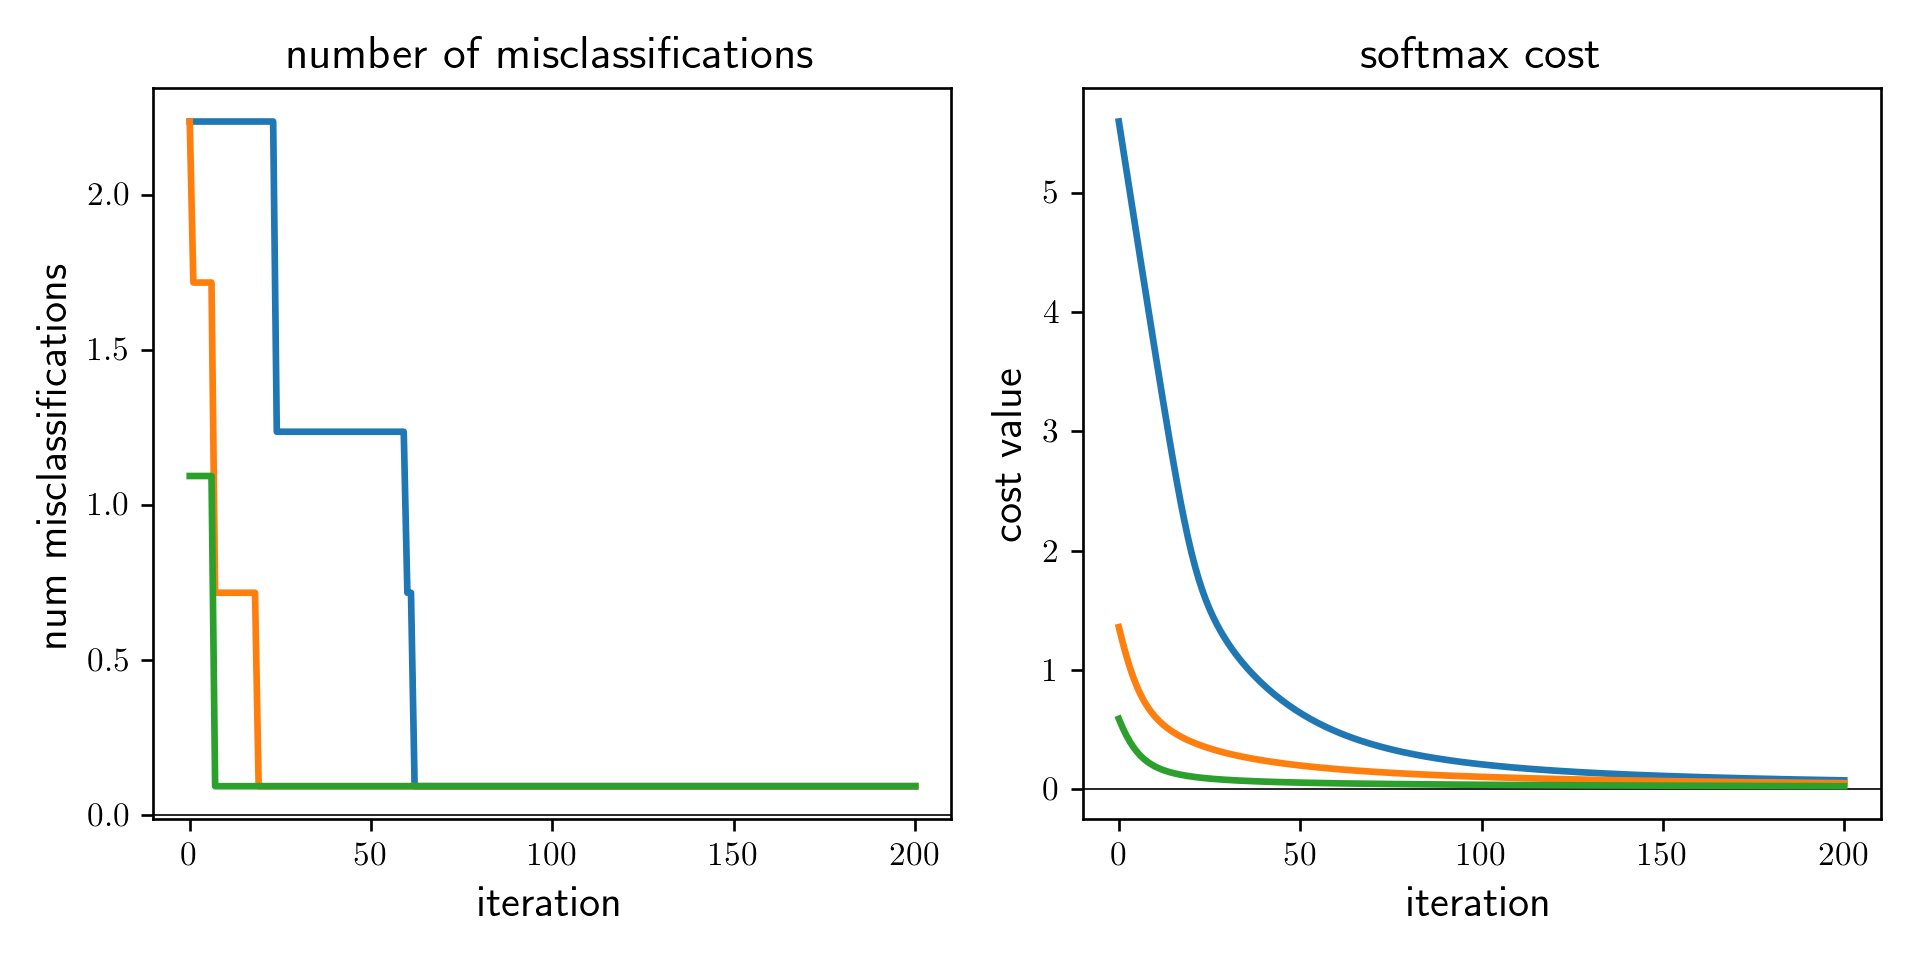

In [22]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
data = np.loadtxt(datapath + '3d_classification_data_v2.csv',delimiter = ',')

# create instance of cost comparison demo
demo = superlearn.cost_comparisons.Visualizer(data)

# run 
demo.compare_to_counting(cost = 'softmax',max_its = 200,num_runs = 3,alpha = 10**(-2),algo = 'gradient_descent')

Comparing the left and right panels we can see that the number of misclassifications and softmax evaluations at each step of a gradient descent run do not perfectly track one another.  That is, it is not the case that just because the cost function value is decreasing that so too is the counting cost (number of misclassifications). Again, this occurs because our softmax cost is only an approximation of the true quantity we would like to minimize - the counting cost.

This has a useful practical implication: during optimization one should save the weight associated with the lowest *number of misclassifications* not the lowest cost value.

> During optimization of the softmax cost one should save the weight associated with the lowest *number of misclassifications* not the lowest cost value.

---

The simplest measure of how well a classifier has been trained on a set of $P$ training datapoints is its *accuracy*, which is the average number of points it classifies correctly.  We can compute this - for example - by taking the average evaluation of the *counting cost* 

\begin{equation}
\text{accuracy}= 1 - \frac{1}{4P}\sum_{p=1}^P \left(\text{sign}\left(\mathring{\mathbf{x}}_p^T\mathbf{w}^{\star} \right) - y_p \right)^2
\end{equation}

which ranges from 0 (no points classified correctly) to 1 (all points classified correctly).  This is not always the best measure of a learned classifier's efficacy as, for instance, it fails to capture the classifier's quality on a highly *imbalanced* dataset. We will discuss this issue later.

## 9.7.5  Confidence scoring

The probabilistic perspective on logistic regression, by design, enables us to assign a probability score to each point in our dataset once the optimal hyperplane parameters $w_0^{\star}$ and $\mathbf{w}^{\star}$ are learned. Specifically, the probability of the point $\mathbf{x}_p$ belonging to class $y=1$ is given by

\begin{equation}
{\cal P}\left(y=1\,|\,\mathbf{x}_{p},w_0^{\star},\mathbf{w}^{\star}\right)=\sigma\left(w_0^{\star}+\mathbf{x}_p^T\mathbf{w}^{\star}\right)
\end{equation} 

This probability score can be interpreted as how 'confident' our classifier is in predicting a label of $y=1$ for $\mathbf{x}_p$. If $w_0^{\star}+\mathbf{x}_p^T\mathbf{w}^{\star}>0$, the larger this evaluation gets the closer the probability gets to a value of 1, and hence the more confident we are of xp belonging to class y=1. On the other hand, when $w_0^{\star}+\mathbf{x}_p^T\mathbf{w}^{\star}<0$ the probability of $y=1$ falls below $50\%$ and as the evaluation gets smaller the probability approaches zero, while at the same time its complement - the probability of $y=0$ - gets closer to 1.       


This notion of confidence - which can be particularly useful when dealing with new datapoints whose labels are not known a priori - is strongly connected to the geometric notion of distance from the separating hyperplane. The figure below shows two datapoints $\mathbf{x}_p$ and $\mathbf{x}_q$, both lying in the positive half-space created by the hyperplane $w_0+\mathbf{x}^T\mathbf{w}=0$, whose distances from the hyperplane can be calculated - using simple algebra - as $\frac{w_{0}+\mathbf{x}_{p}^{T}\mathbf{w}}{\left\Vert \mathbf{w}\right\Vert _{2}}$ and $\frac{w_{0}+\mathbf{x}_{q}^{T}\mathbf{w}}{\left\Vert \mathbf{w}\right\Vert _{2}}$, respectively.      

<figure>
  <img src= '../../mlrefined_images/superlearn_images/distance_to_boundary.png' width="70%" height="80%" alt=""/>
  <figcaption>   
<strong>Figure 4:</strong> <em> Visual representation of the distance to the hyperplane $w_0+\mathbf{x}^T\mathbf{w}=0$, from two points $\mathbf{x}_p$ and $\mathbf{x}_q$ lying above it. </em>  </figcaption> 
</figure>

Ignoring the common denominator $\left\Vert \mathbf{w}\right\Vert _{2}$, the distance from a point to the hyperplane is proportional to its evaluation using the hyperplane, which is then mapped to a number between 0 and 1 via the sigmoid function, producing a valid probability score.  

> The notion of class probability is closely connected to the geometric notion of distance to the decision boundary. The farther a point is from the decision boundary the more confident the classier becomes about its predicted label. Conversely, as we get closer to the boundary, the classifier loses 'confidence' and the probability scores for each class get closer in value. In the most extreme case where the point lies precisely in the separating hyperplane, the distance is zero, giving a 50-50 probability of the point belonging to either class.